7. An sWeights question. Take a look at the data in dataset/sweights.npy. This is an array of two dimensional data containing two components (a signal and a background). The first dimension will be considered our "discriminant" dimension (we'll fit this one). The second dimension is the "control" dimension which we want to extract the signal properties of.

(a) First you will need to use some estimation procedure to estimate the parameters of the signal and background models when fitted to dimension $X$. The background is a $\log$ normal distribution with free parameters, $s, \mu_b$ and $\sigma_b$. The signal is a log gamma distribution with free parmaeters, $c, \mu_s, \sigma_s$. The last free parameter is the signal fraction $f$. You will also need to incorporate an overall normalisation parameter $N$, which can be done by parameterising $N s=f N$ and $N b=(1-f) N$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.special as sps
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
# integrate function
from scipy.integrate import quad

In [3]:
with open('sweights.npy', 'rb') as f:
    data = np.load(f)
print(data)

[[6.54965576 1.45010105]
 [0.01699509 0.76274355]
 [6.57320459 2.94330743]
 ...
 [4.16989137 2.94908669]
 [1.85822703 4.1973203 ]
 [4.21106962 1.56091839]]


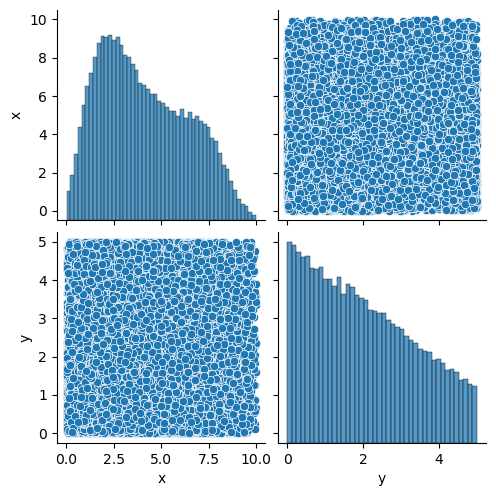

In [4]:
# plot scattered plot of data[:,0] vs data[:,1]
df = pd.DataFrame(data, columns=['x', 'y'])
sns.pairplot(df)
plt.show()


In [5]:
# define a log- nomral distribution and log-gamma distribution and its pdf
def log_normal_pdf(x, mean, sigma):
    return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mean)**2/(2*sigma**2))

def log_gamma_pdf(x, k, theta):
    return 1/(sps.gamma(k)*theta**k) * x**(k-1) * np.exp(-x/theta) ## log gamma ot gamma? using log gamma returns error for iminute

def model(x,f, mean, sigma, k, theta):
    return (f* log_normal_pdf(x, mean, sigma) +  (1-f) * log_gamma_pdf(x, k, theta))


/Users/zhongjunbao/miniconda3/envs/mphil/lib/python3.9/site-packages/iminuit/cost.py:75: RuntimeWarning: invalid value encountered in log
  return np.log(x + 1e-323)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.179e+05                  │              Nfcn = 298              │
│ EDM = 5.4e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

/var/folders/ry/r28_vw1507xg9nf1c8mtsr500000gn/T/ipykernel_84588/4113456242.py:3: RuntimeWarning: divide by zero encountered in divide
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mean)**2/(2*sigma**2))
/var/folders/ry/r28_vw1507xg9nf1c8mtsr500000gn/T/ipykernel_84588/4113456242.py:3: RuntimeWarning: divide by zero encountered in log
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mean)**2/(2*sigma**2))
/var/folders/ry/r28_vw1507xg9nf1c8mtsr500000gn/T/ipykernel_84588/4113456242.py:3: RuntimeWarning: invalid value encountered in multiply
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mean)**2/(2*sigma**2))


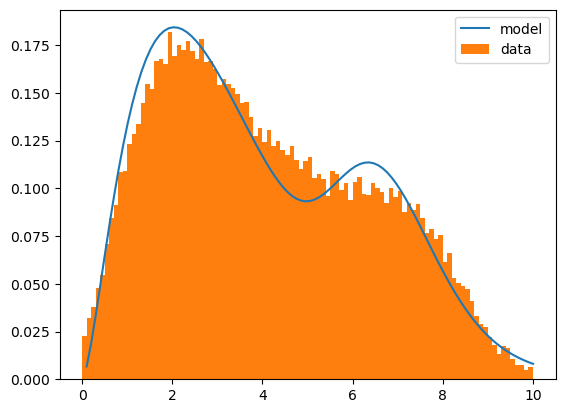

In [6]:
# negtive log likelihood function
nll = UnbinnedNLL(data[:,0], model)

# iminute object
mi = Minuit(nll, f = 0, mean = 4, sigma=1, k=2, theta=1)

# set limits
mi.limits['mean'] = (0, 10)
mi.limits['f'] = (0, 1)

# minimization
mi.migrad()

#hessian
mi.hesse()

# result
print(mi)

f, mean, sigma, k, theta = mi.values

# plot the fitted model
x = np.linspace(0, 10, 100)
y = model(x, f, mean, sigma, k, theta)
plt.plot(x, y, label='model')
plt.hist(data[:,0], bins=100, density=True, label='data')
plt.legend()
plt.show()

In [ ]:
#### ???? 
###  THis looks like a terrible fit